# Udacity Self-Driven Car Simulator için Model Oluşturma

Simulasyon uygulaması hakkında bilgi almak için [buraya](https://github.com/udacity/self-driving-car-sim) tıklayabilirsin.

İndirmek için:

* [Windows](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/Term1-Sim/term1-simulator-windows.zip)
* [Mac](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/Term1-Sim/term1-simulator-mac.zip)
* [Linux](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/Term1-Sim/term1-simulator-linux.zip)

## Uygulama Hakkında Resimler

<a href="https://ibb.co/7WPHVMx"><img src="https://i.ibb.co/7WPHVMx/1-udacity.png" alt="1-udacity" border="0"></a>
<a href="https://ibb.co/jD4VhW1"><img src="https://i.ibb.co/jD4VhW1/2-udacity-sim.png" alt="2-udacity-sim" border="0"></a>
<a href="https://ibb.co/ykvN5YL"><img src="https://i.ibb.co/ykvN5YL/3-udacity-car.png" alt="3-udacity-car" border="0"></a>


## Uygulama Üzerinden Veri Oluşturma

Trainmode kısmına gelip, `R` tuşu ile kayıt edileceği klasörü seçip tekrardan `R` ye basarak kayıt işlemini başlatın.

* *Siz arabayı sürerken otamatik olarak kayıt işlemlerini yapacaktır.*
* *Sürüş bittiğinde tekrardan `R` ye basmanız gerekmekte.*

## Uygulama ile Üretilen Veriliri Kullanma

Uygulama sonucunda çıkan verileri [github](https://github.com/) vb. gibi açık paylaşım sitelerinin aktarınız. 

* Github için proje dizinine gelip `Clone` butonuna basarak https ile başlayan URL'i kopyalayın.
  * *Kopyalanan URL alt kısında kullanılacaktır.*

## Verileri oluşturma

*   Git üzerinden verileri sisteme indirme
*   Sistemde verilerinin konumunu öğrenme




In [1]:
# Verileri indirme
!git clone https://github.com/otobil-iu/track

fatal: destination path 'track' already exists and is not an empty directory.


In [2]:
# Verilerinin dizin ve yol bilgisini öğrenme
!ls track

driving_log.csv  IMG


### Verileri çoğaltma (Data Augmentation) kütüphanesini ekleme
Verileri çoğaltarak makine öğrenimi verimli hale getirmek amaçlanır.

> `imgaug`: Açık veri çoğaltma fonksiyonlarını barındırır




In [3]:
!pip3 install imgaug

## Gerekli kütüphaneleri tanımalama


*   `Numpy` matrix işlemleri
*   `Matplotlib.pyplot` grafik / çizim işlemleri
*   `Keras` Makine öğrenimi
*   `cv2` Görüntü işleme (openCV)
*   `pandas` Veri analizi
*   `random` Rastgelelik







In [4]:
# Matrix işlemleri
import numpy as np

# Grafik & Çizim işlemleri
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Makine öğrenimi
import keras
from keras.models import Sequential # Model
from keras.optimizers import Adam # Optimizasyon
from keras.layers import Convolution2D, Dropout, Flatten, Dense # Model katmanları

# Veri Çoğaltma (Data Augmentation)
from imgaug import augmenters as iaa

# Görüntü işleme (openCV)
import cv2

# Veri analizi
import pandas as pd

# Dosya yolu işlemleri
import os
import ntpath

# Rastgelelik işlemleri
import random

# Veri işleme metodları
from sklearn.utils import shuffle # Karıştırma
from sklearn.model_selection import train_test_split # Parçalayıp uygun forma sokma

Using TensorFlow backend.


## Verileri işleme

* Veri yolu ve veriinin sütunlarını isimlendirme
* Dosya yolundan dosya adını alma ve verileri güncelleme
* Verileri görselleştirme (bar grafik yöntemi ile)


In [5]:
# Veri dosyasının adı
veri_dizini = 'track'
veri_dosyasi = "driving_log.csv" #!ls track ile buluyoruz.

# Sütunları indeksleme
MERKEZ_SUTUNU_INDEKSI = 0
SOL_SUTUN_INDEKSI = 1
SAG_SUTUN_INDEKSI = 2
DIREKSIYON_SUTUNU_INDEKSI = 3

# Sütun isimleri
MERKEZ_SUTUNU_ISMI = "Merkez"
SOL_SUTUN_ISMI = "Sol"
SAG_SUTUN_ISMI = "Sag"
DREKSIYON_SUTUNU_ISMI = "Direksiyon"
GAZ_SUTUNU_ISMI = "Gaz"
FREN_SUTUNU_ISMI = "Fren"
HIZ_SUTUNU_ISMI = "Hiz"

# Verideki sütunların adlarını tanımalama
# Steerring: Direksiyon (- sol, + sağ)
# Throttin: Gaz
# Reverse: Ters gitme verisi (?)
# Speed: Hız
veri_sutunlari = [
    MERKEZ_SUTUNU_ISMI, 
    SOL_SUTUN_ISMI, 
    SAG_SUTUN_ISMI, 
    DREKSIYON_SUTUNU_ISMI, 
    GAZ_SUTUNU_ISMI, 
    FREN_SUTUNU_ISMI, 
    HIZ_SUTUNU_ISMI
]



# Verileri okuyup, sütunlarına tanımlanan isimleri verme
veri = pd.read_csv(os.path.join(veri_dizini, veri_dosyasi), names = veri_sutunlari)

# Sütun uzunlarını 'doldur' olarak ayarlama
pd.set_option('display.max_colwidth', -1)

# Verilerin başına bakmak
veri.head()

Merkez  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                    Sol  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                     Sag  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   Direksiyon  Gaz  Fren       Hiz  
0  0.0         0.0  0.0   0.649786  
1  0.0         0.0  0.0   0.627942  
2  0.0         0.0  0.0   0.622910  
3  0.0         0.0  0.0   0.619162  
4  0.0         0.0  0.0   0.615438

In [0]:
# Dosya yolundan dosya ismini döndürür
def dosya_adi_al(dosya_yolu):
  # Dosya bilgisini yolundan alma
  dizin_yolu, dosya_adi = ntpath.split(dosya_yolu)
  return dosya_adi

In [7]:
# Verilerin ismini kırpma
veri[MERKEZ_SUTUNU_ISMI] = veri[MERKEZ_SUTUNU_ISMI].apply(dosya_adi_al)
veri[SOL_SUTUN_ISMI] = veri[SOL_SUTUN_ISMI].apply(dosya_adi_al)
veri[SAG_SUTUN_ISMI] = veri[SAG_SUTUN_ISMI].apply(dosya_adi_al)

# Verilerin başını gösterme
veri.head()

Merkez                               Sol  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                                 Sag  Direksiyon  Gaz  Fren       Hiz  
0  right_2018_07_16_17_11_43_382.jpg  0.0         0.0  0.0   0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0         0.0  0.0   0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0         0.0  0.0   0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0         0.0  0.0   0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0         0.0  0.0   0.615438

## Verileri dengeleme
0 açısı için çok fazla veri olduğundan genelleme işlemi iyi çalışmaz. Makine her zaman düz gitmeye çalışır dönüşlerden kaçınır. Bu sebeple daha genel veriler elde etmek için resmin üst kısmını kırpmamız ve dağılımı birbirine yakınlaştırmamız lazım.


<BarContainer object of 25 artists>

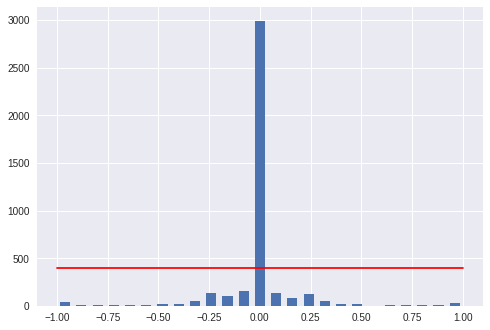

In [8]:
# Grafikteki çubuk sayısı (num_bins)
cubuk_sayisi = 25

# Bir değer için alınacak en fazla örnek sayısı (Genelleştirmeyi korumak için)
veri_ornek_limiti = 400 # threshold / eşik

# Verileri istenen parçaya ayırma (hist, bins)
grafik, cubuklar = np.histogram(veri[DREKSIYON_SUTUNU_ISMI], cubuk_sayisi)

# Merkez verisini 0 olacak şekilde ayarlama
# (İlk veri hariç tüm veriler + Son veri hariç tüm veriler) / 2
cubuk_merkezi = (cubuklar[:-1] + cubuklar[1:]) / 2

# Veri sınır çizgisini çizdirme (x1, x2, y1, y2)
plt.plot((np.min(veri[DREKSIYON_SUTUNU_ISMI]), np.max(veri[DREKSIYON_SUTUNU_ISMI])), (veri_ornek_limiti, veri_ornek_limiti), 'r')

# Verileri çubuk grafikte çizdirme
plt.bar(cubuk_merkezi, grafik, width=0.05)

###  Veri kesme işlemi
Verilerin düzensiz olmasından kaynaklı belli başlı veriler kırpılmalı. (Kırmızı çizginin üstündekiler.) 

Kırpma işlemini yapmak için;


* Veriler arasındaki bağlantının kopmaması adına veriler karıştırılır.
* Karışık verilerin üstü kırpılır.
* Orjinal veriden çıkarılması gereken karışık veriler, indexleriyle çıkarılır.



In [0]:
# Kırpma işlemi birden fazla gerçekleşirse hata verir o sebeple boolean kontrolü ekliyoruz
kirpildiMi = False

Toplam veri: 4053
Kaldırılacak veri: 2590
Verinin son hali:  1463


<BarContainer object of 25 artists>

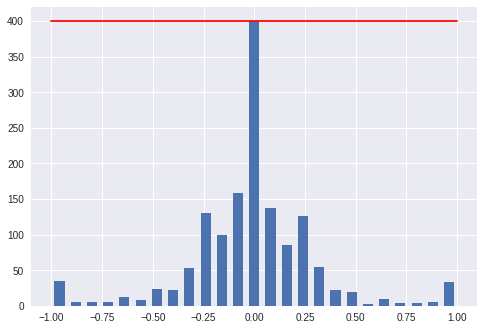

In [10]:
if not kirpildiMi:
  # Düzeltimemiş verinin içerik saysını gösterme
  print('Toplam veri:', len(veri[DREKSIYON_SUTUNU_ISMI]))

  # Kaldırılacak listesi tanımala
  kaldirilacak_liste = []

  for i in range(cubuk_sayisi):
    # Geçici listeyi oluşturma
    gecici_liste = []

    # Her bir direksiyon açı verisini eğer oluşturulan çubuklar arasındaysa listeye ekliyoruz
    for j in range(len(veri[DREKSIYON_SUTUNU_ISMI])):
      if veri[DREKSIYON_SUTUNU_ISMI][j] >= cubuklar[i] and veri[DREKSIYON_SUTUNU_ISMI][j] <= cubuklar[i+1]:
        gecici_liste.append(j)

    # Veri kopukluğu olmaması adına listesyi karıştırıp sileceğiz
    gecici_liste = shuffle(gecici_liste) # sklearn.utils'den shuffle kullanıldı.

    # Sınır sayımızdan sonraki verileri alıyoruz (kaldırmak için)
    gecici_liste = gecici_liste[veri_ornek_limiti:]

    # Geçici verileri silinecek verilerin indekslerinin tutulduğu yerde saklama
    kaldirilacak_liste.extend(gecici_liste)


  print("Kaldırılacak veri:", len(kaldirilacak_liste))

  # Kaldırılmasını istedimiz verileri indekslerin tutulduğu diziyle kaldırma
  # inplace: üzerine yazma veya üzerinde saklama (?) 
  veri.drop(veri.index[kaldirilacak_liste], inplace=True)

  print("Verinin son hali: ", len(veri[DREKSIYON_SUTUNU_ISMI]))

  # Kırpma işlemi tamamlandığından güvenlik için kırpıldı değerini true yapıyoruz.
  kirpildiMi = True;

  # Histogramı güncelleme
  grafik, _ = np.histogram(veri[DREKSIYON_SUTUNU_ISMI], (cubuk_sayisi))

# Veri sınır çizgisini çizdirme (x1, x2, y1, y2)
plt.plot((np.min(veri[DREKSIYON_SUTUNU_ISMI]), np.max(veri[DREKSIYON_SUTUNU_ISMI])), (veri_ornek_limiti, veri_ornek_limiti), 'r')

# Verileri çubuk grafikte çizdirme
plt.bar(cubuk_merkezi, grafik, width=0.05)

###  Verileri train ve validation olarak parçalara ayırma
Verileri daha sağlıklı makine öğrenimi için gerekli olan train-validation parçalarına ayırıyoruz. 

In [0]:
def direksiyon_resimlerini_yükle(veri_dizini, veri):
  # Direksiyon değerlerinin resimlerinin ekleneceği dizi
  resim_yollari = []
  # Direksiyon değerlerinin kayıt edileceği dizi
  direksiyonlar = []
  
  # Tüm verilerden eşleme yapıyoruz
  for i in range(len(veri)):
    # Veri içerisindeki i. satırı değişkene atıyoruz
    indeksli_veri = veri.iloc[i];
    
    # Gerekli verileri satır değişkeninden çekiyoruz
    merkez, sol, sag = indeksli_veri[MERKEZ_SUTUNU_INDEKSI], indeksli_veri[SOL_SUTUN_INDEKSI], indeksli_veri[SAG_SUTUN_INDEKSI]
    direksiyon = indeksli_veri[DIREKSIYON_SUTUNU_INDEKSI]
    
    # Çekilen verileri dizilere ekleme
    # Yol eklerken sistem yoluna (os.path...) strip işlemi yapılmış veri. (Boşluk gibi sorun oluşturabilecek karakterleri engellemek için)
    resim_yollari.append(os.path.join(veri_dizini, merkez.strip())) # Şimdilik sadece merkez'i aldık (?)
    direksiyonlar.append(direksiyon)
    
  # Dizileri geri döndürme
  return resim_yollari, direksiyonlar

In [12]:
# Resim yollarını ve direksiyon değerleri alma
resim_yollari, direksiyonlar = direksiyon_resimlerini_yükle(veri_dizini + '/IMG', veri)

# Verileri uygun forma sokuyoruz (sklearn.model_selection içinden)
# Parametleri: Inputs, Labels, ek ayarlar... 
X_train, X_valid, Y_train, Y_valid = train_test_split(resim_yollari, direksiyonlar, test_size=0.2, random_state=6)

# Ekrana işlenmiş veri sayılarını yazdırma
print ('Train Verileri: {}\nValidation Verileri: {}'.format(len(X_train), len(X_valid)))

Train Verileri: 1170
Validation Verileri: 293


Text(0.5, 1.0, 'Validation Kümesi')

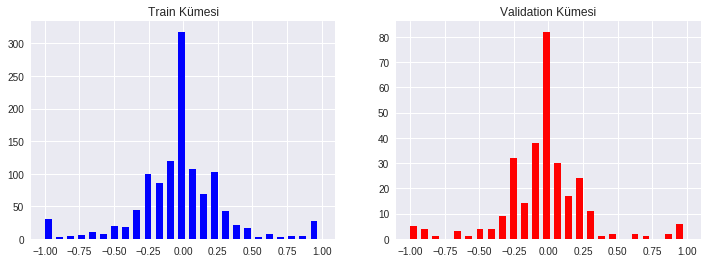

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(Y_train, bins=cubuk_sayisi, width=0.05, color='blue')
axes[0].set_title('Train Kümesi')
axes[1].hist(Y_valid, bins=cubuk_sayisi, width=0.05, color='red')
axes[1].set_title('Validation Kümesi')

## Verileri Çoğaltma
Data Augmentations teknikleri adı altında resimleri çoğaltma (verimi arttırmak için)

* Resmi yakınlaştırma

**Resmi yakınlaştırma**

In [0]:
def yaklastir(resim):
  # scale: Yaklaştırma aralığı (1 = normal)
  yakinlastir = iaa.Affine(scale=(1, 1.3))
  # Yakınlasan resmi alma
  return yakinlastir.augment_image(resim)

In [0]:
# Kaydırma
def kaydir(resim):
  pan = iaa.Affine(translate_percent= {
      "x": (-0.1, 0.1),
      "y": (-0.1, 0.1)
  })
  return pan.augment_image(resim)

In [0]:
def parlaklik_degistir(resim):
  # Resim pixel yoğunluğu içindeki sayıyla çarpar (1'den düşük değerler karanlık hale sokar)
  # Karanlık değerler için model daha verimli sonuçlar veriyor imiş.
  # Verilen değerler arsında rastgele çarpım yapılır
  parlaklik = iaa.Multiply((0.2, 1.2))
  return parlaklik.augment_image(resim)

In [0]:
def dondur(resim, direksiyon_acisi):
  # 0: Dikey
  # 1: Yatay 
  # -1: Her iki yönde de döndürme
  resim = cv2.flip(resim, 1)
  
  # Resim döndüğü için direksiyon açısı uyumsuz olacak (1 derece ise -1 olacak)
  direksiyon_acisi = -direksiyon_acisi
  
  return resim, direksiyon_acisi

In [0]:
def rastgele_cogalt(resim_yolu, direksiyon_acisi):
  # Resmi okuma
  resim = mpimg.imread(resim_yolu)

  # Her bir tekniği %50 ihtimalle uygulama
  if np.random.rand() < 0.5:
    resim = kaydir(resim)
  if np.random.rand() < 0.5:
    resim = yaklastir(resim)
  if np.random.rand() < 0.5:
    resim = parlaklik_degistir(resim)
  if np.random.rand() < 0.5:
    resim, direksiyon_acisi = dondur(resim, direksiyon_acisi)
    
  return resim, direksiyon_acisi



**Augmentation (çoğaltma) işlemini test etme**

Verileri yanlış etkilememesi adına fonksiyonlarımızı test etmemiz gerekmekte.







Text(0.5, 1.0, 'Orjinal Resim\nDireksiyon Açısı -1.0')

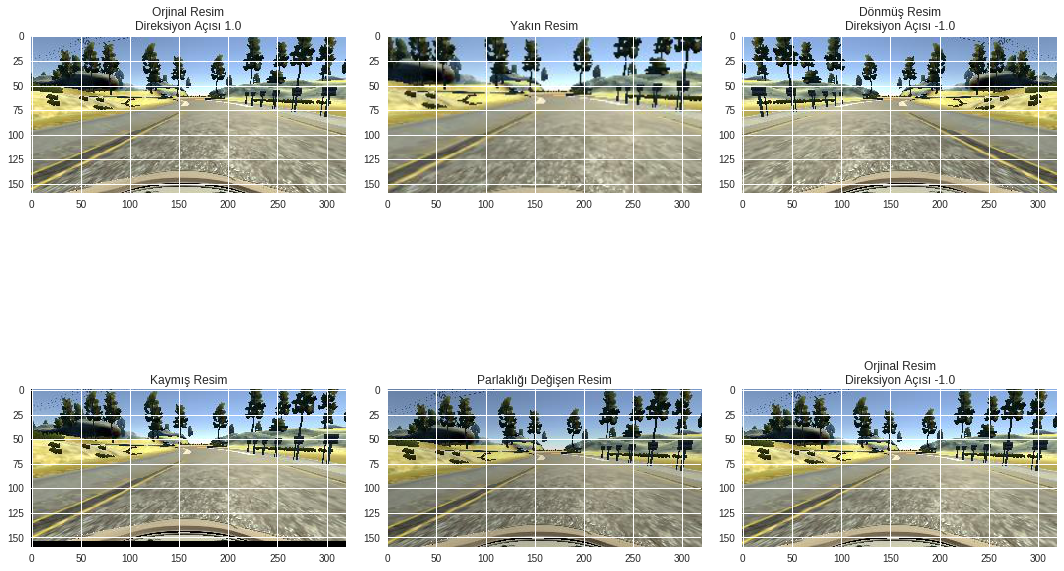

In [19]:
index = random.randint(0, 1000)
resim = resim_yollari[index]
direksiyon_acisi = direksiyonlar[index]

orjinal_resim = mpimg.imread(resim)

sekil, eksen = plt.subplots(2, 3, figsize=(15, 10))
sekil.tight_layout()

eksen[0][0].imshow(orjinal_resim)
eksen[0][0].set_title('Orjinal Resim\nDireksiyon Açısı {}'.format(direksiyon_acisi))

yakın_resim = yaklastir(orjinal_resim)
kaymis_resim = kaydir(orjinal_resim)
parlakligi_degisen_resim = parlaklik_degistir(orjinal_resim)
donmus_resim, direksiyon_acisi = dondur(orjinal_resim, direksiyon_acisi)

eksen[0][1].imshow(yakın_resim)
eksen[0][1].set_title('Yakın Resim')

eksen[0][2].imshow(donmus_resim)
eksen[0][2].set_title('Dönmüş Resim\nDireksiyon Açısı {}'.format(direksiyon_acisi))

eksen[1][0].imshow(kaymis_resim)
eksen[1][0].set_title('Kaymış Resim')

eksen[1][1].imshow(parlakligi_degisen_resim)
eksen[1][1].set_title('Parlaklığı Değişen Resim')

eksen[1][2].imshow(orjinal_resim)
eksen[1][2].set_title('Orjinal Resim\nDireksiyon Açısı {}'.format(direksiyon_acisi))

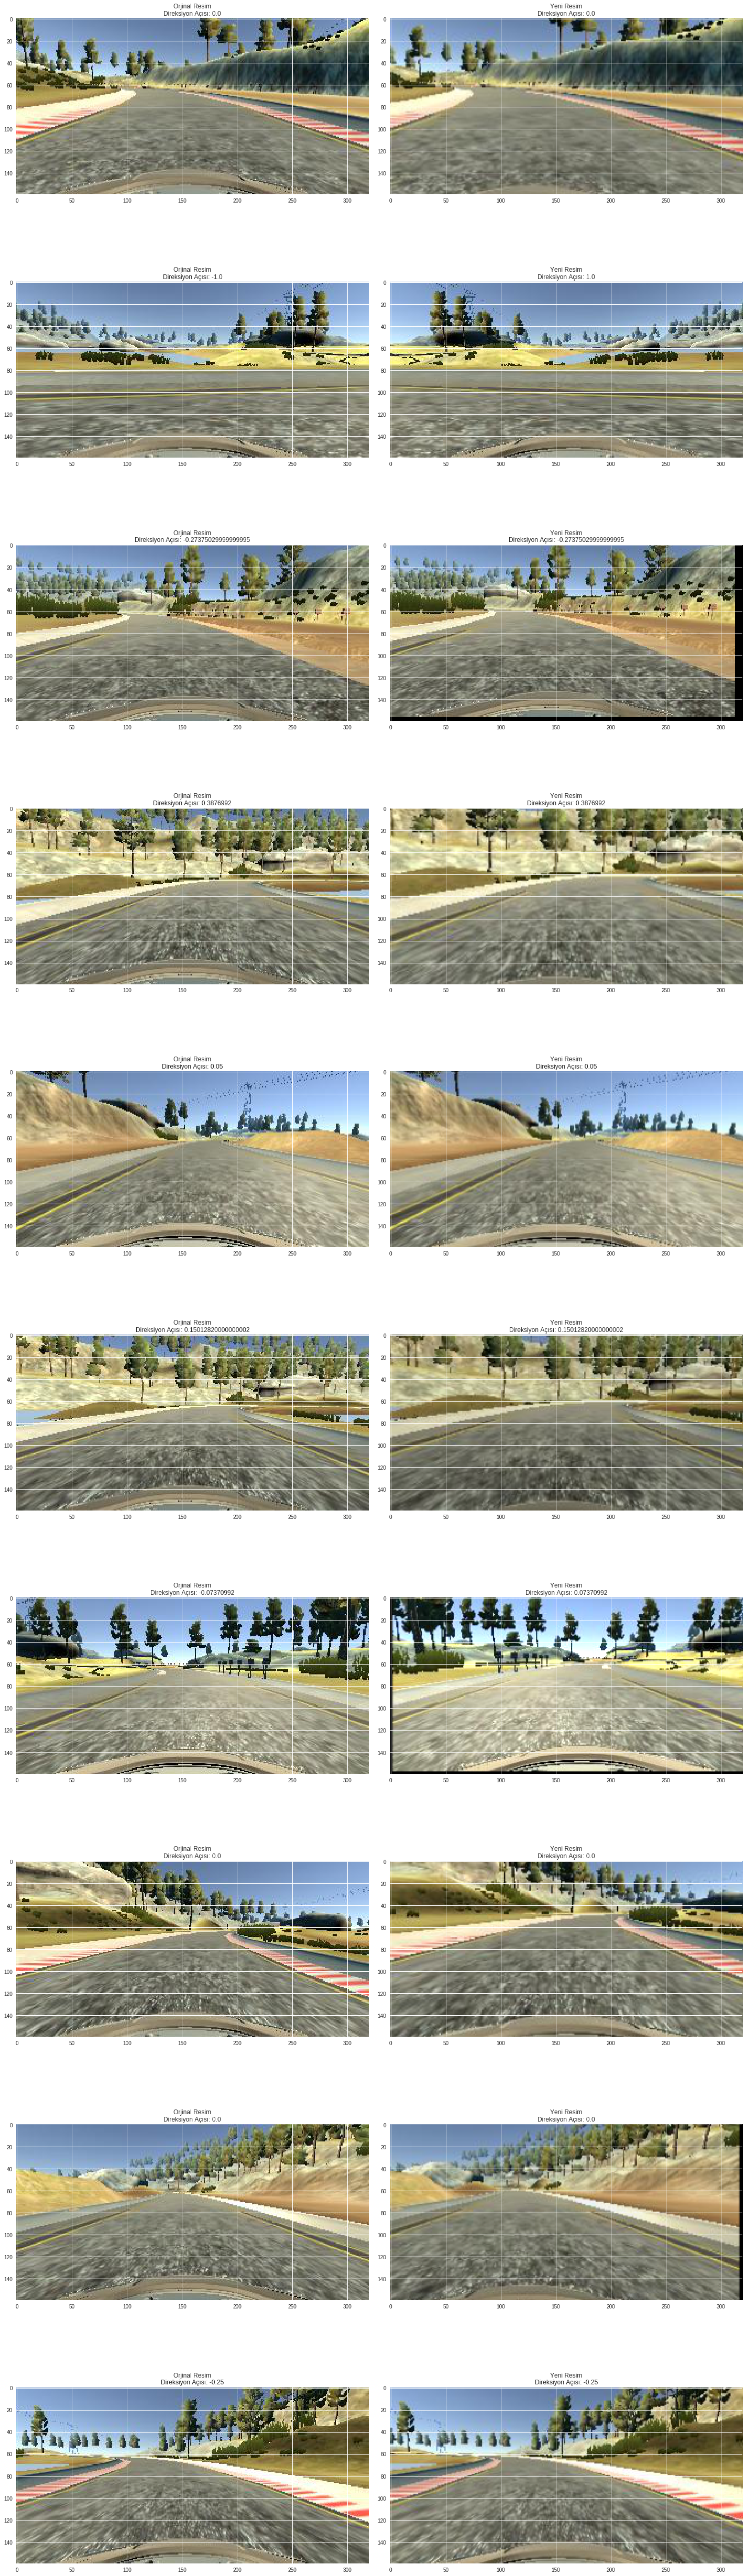

In [20]:
sutun_sayisi = 2
satir_sayisi = 10

sekil, eksen = plt.subplots(satir_sayisi, sutun_sayisi, figsize=(20, 70))
sekil.tight_layout()

for i in range(0, satir_sayisi):
  # Rastgele index oluşturma
  index = random.randint(0, len(resim_yollari) - 1)
  
  # İndex ile resmi ve direkyion açısını alma
  resim_yolu = resim_yollari[index]
  direksiyon_acisi = direksiyonlar[index]
  
  # Orjinali ve değişmiş halini oluşturma
  orjinal_resim = mpimg.imread(resim_yolu)
  yeni_resim, yeni_direksiyon_acisi = rastgele_cogalt(resim_yolu, direksiyon_acisi)
  
  eksen[i][0].imshow(orjinal_resim)
  eksen[i][0].set_title('Orjinal Resim\nDireksiyon Açısı: {}'.format(direksiyon_acisi))
  
  eksen[i][1].imshow(yeni_resim)
  eksen[i][1].set_title('Yeni Resim\nDireksiyon Açısı: {}'.format(yeni_direksiyon_acisi))


## Verileri ön işleme (preprocessing)
Preprocessing adı verilen aşama ile veriileri son hale sokmadan önce bir kaç işlemden geçirmemiz gerekmekte:


*  Gereksiz kısımları resimden kırpma
  * Gereksiz yerler işlenmeyeceğinden işlem gücünden kazanç sağlanır
*  Resim formatını RGB'den YUV'ye çevirme
  * *NVIDIA çalışanlarının söylemesine göre; onlar da bu format üzerinde veri işlemekte ve bu format RGB ve GreyScale (gri) formatından daha verimli*
  * Y: Parlaklık
  * U,V: Renk veren değerler
* Gaussion Blur ile resim yeniden şekillendirilir
  * Resimdeki gereksir yoğunluk kaldırılarak daha yumuşak hale getirilir.
* Resmin boyutunu küçültme
  * Resmin boyutu küçültülerek işlem gücü azaltılır.
  * Nvidia model mimarilerindeki varsayılan boyut: (200, 66) 
* Normalization (normalizasyon) işlemi
  * Verilerin 0-1 arsında olmasını sağlarayarak işlem gücünden tasarruf sağlamaya çalışmak (?)


In [0]:
# Verileri işlemek için metod
def resim_on_isleme(resim):  
  # Resmin gereksiz kısımlarını resimden kırpna
  # 65 ve 135 ile arasındakileri işliyoruz.
  # Not: Buna resmin aksis değerlerine bakarak varsayımlarla karar veriyoruz
  resim = resim[60:135, :, :]
  
  # Resmi RGB formatından YUV formatına çevirme
  resim = cv2.cvtColor(resim, cv2.COLOR_RGB2YUV)
  
  # Gaussian Blur yöntemi ile resmi daha hafif hale getirme
  # Resim, Kernel boyutu, Kernel sapması
  resim = cv2.GaussianBlur(resim, (3, 3), 0)
  
  # İşlem gücünü düşürmek için resmi yeniden boyutlandırma
  # Resim, Yeni Boyut (Nvidia model mimarisi için kullanılan boyut 200,66)
  resim = cv2.resize(resim, (200, 66))
  
  # Normalizasyon işlemi ile verileri 0-1 arasına alıyoruz
  resim = resim / 255
  
  return resim
    

### Verileri ön işlemek için hazırladığmız fonksiyonu test etme ve kullanma

* Olası hatalı işlemde, verierin yanlış değişmemesinden emin olmak için öncelikle bir veri üzerinde test edilir
* Ardından hata çıkmazsa map fonksiyonu ile tüm verilere fonksiyon uygulanır

Text(0.5, 1.0, 'Ön işlenmiş resim')

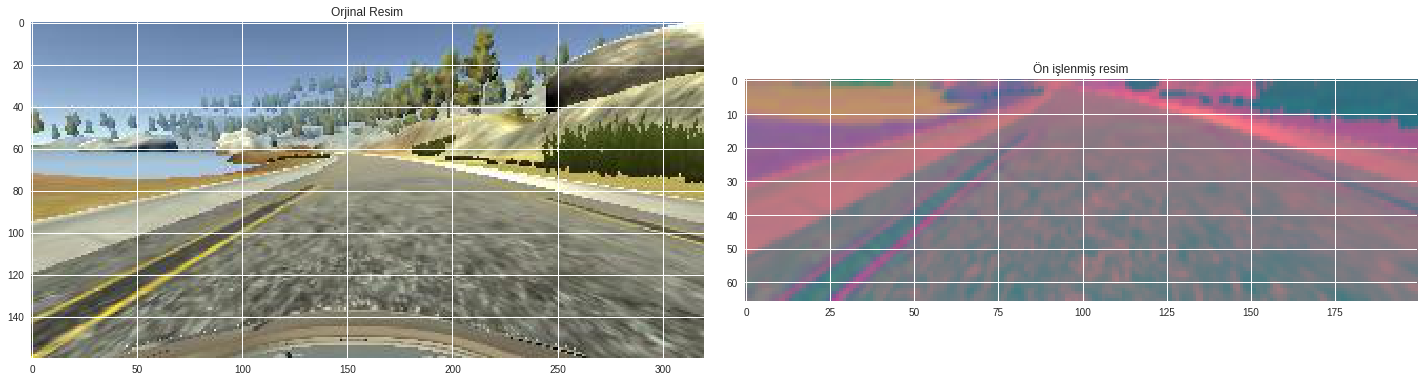

In [22]:
# Rastgele bir resmin yolunu alma
resim_yolu = resim_yollari[100]

# Orjinal ve işlenmiş resmi çizdirmek için kayıt altına alma
orjinal_resim = mpimg.imread(resim_yolu)
on_islenmis_resim = resim_on_isleme(orjinal_resim)

# Aksis üzerinde şekli çizdirme
sekil, aksis = plt.subplots(1, 2, figsize=(20, 15))

# Şekilleri daha bitişik çizdirme
sekil.tight_layout()

# Aksisleri ayarlama
aksis[0].imshow(orjinal_resim)
aksis[0].set_title('Orjinal Resim')
aksis[1].imshow(on_islenmis_resim)
aksis[1].set_title('Ön işlenmiş resim')

## Batch Generator (Toplu Veri Çoğaltma)
Verileri önceden çoğaltıp hafızaya atarsak çok fazla yer kaplar. Bu sebeple gerektiği vakit oluşturup hemen kullanacağız.


> *Generator, iteratior ve yieldın ne olduğu hakkında bilgi almak için [buraya](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do) tıklayabilirsin.*

**Batch Generator Fonksiyonu**

* `X` Resim yollarını (input)
* `Y` Resim davranışları / Direksiyon (label)
* `batch_size` Üretilme sayısı
* `isTraining` Sadece train veri kümesine çoğatlma yaptığımızdan True | False değeri alır.


In [0]:
def batch_generator(X, Y, batch_size, isTraining):
  while True:
    # Çoğaltılan verinin saklanacağı değişkenler
    resimler = []
    direksiyonlar = []
    
    # Verileri çoğaltma
    for i in range(batch_size):
      # Rastgele index oluşturma
      r = random.randint(0, len(X) - 1)
      
      # Train aşamasında çoğaltma işlemi yapılır
      if isTraining:      
        resim, direksiyon = rastgele_cogalt(X[r], Y[r])
      # Validation aşamasında veriler değiştirilmez
      else:
        resim = mpimg.imread(X[r])
        direksiyon = Y[r]
      
      # Resmi ön işleme
      resim = resim_on_isleme(resim)
      
      # Yine resimleri diziye ekleme
      resimler.append(resim)
      direksiyonlar.append(direksiyon)
    
    # Fonksiyonun kullanıldığı her döngü için buradan değer döndürür
    yield (np.asarray(resimler), np.asarray(direksiyonlar))   

### Batch Generator doğru çalışıyor mu test etme
Fonksiyonun doğru çalışıp çalışmadığını öğrenmek için batch_size = 1 olan bir deneme yapmamız gerekmekte.


Text(0.5, 1.0, 'Validation (doğruluma) resmi')

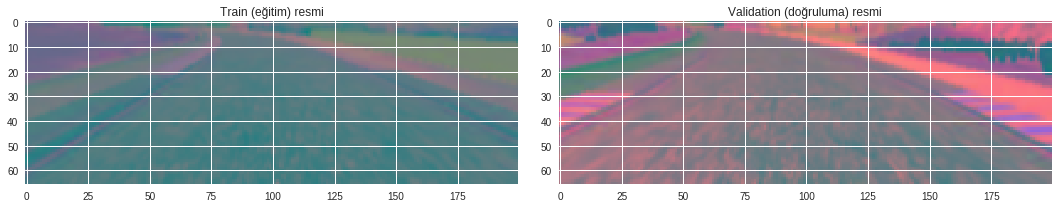

In [29]:
X_train_gen, Y_train_gen = next(batch_generator(X_train, Y_train, 1, True)) # 1 = True
X_valid_gen, Y_valid_gen = next(batch_generator(X_valid, Y_valid, 1, False)) # 0 = False

sekil, eksen = plt.subplots(1, 2, figsize=(15, 10))
sekil.tight_layout()

r = random.randint(0, len(X_train_gen) - 1)
eksen[0].imshow(X_train_gen[r])
eksen[0].set_title("Train (eğitim) resmi")

eksen[1].imshow(X_valid_gen[r])
eksen[1].set_title("Validation (doğruluma) resmi")

## Model Oluşturma
Behavioral Clonning için en uygun model tipi Nvidia Model olarak geçmektedir.
> Mnistte ve Trafik İşaretlerinde olduğu gibi düşük boyutta çok fazla veri olmadığınından diğer modeller verimsiz kalmaktadır.

* Nvidia modeli tanımlanır
* Model özeti ile tanımlanan model kontrol edilir
* Modele veriler eklenir
  * epoch için 30 değeri normale nazaran fazladır. Az veri olduğu için yüksek seçilmiştir.
* Relu activasyonu yerine elu aktivasyonu kullanılır.
  * Relu negatif değişimler için  0 değeri verdiğinde öğrenip oluşturmaz. Elu, relunun aksıne en fazla -1 de olsa öğrenime katkı sağlar.
* Model'in sonucunda *overfitting* oluyorsa bu durumu engellemek için *Dropout* katmanlarının sayısı arttırılır.
  * *Overfitting* Fazla öğretmeden kaynaklı kayıp. Düz çizgi yerine şekilli çizgi olur ve genelleştirmeyi engeller.

In [0]:
def nvidia_model():
    model = Sequential()
    # Filtre sayısı, kernel boyutu,
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    # model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    # model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    # model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='elu'))
    # model.add(Dropout(0.5))
    
    model.add(Dense(1)) # output
    
    model.compile(loss='mse', optimizer=Adam(lr=1e-4)) # Eski optimizasyon: 1e-3 = 10^-3
    return model
    

In [31]:
# Modeli tanımlama
model = nvidia_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  if __name__ == '__main__':


In [32]:
# Modele verileri atama
# gecmis = model.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid), batch_size=100, verbose=1, shuffle=1)
gecmis = model.fit_generator(
    batch_generator(
        X_train, 
        Y_train, 
        100, 
        True
    ), 
    steps_per_epoch=300, 
    epochs=10, 
    validation_data=batch_generator(
        X_valid, 
        Y_valid, 
        100, 
        False
    ), 
    validation_steps=200, 
    verbose=1, 
    shuffle=1
)

Epoch 1/10
300/300 [==============================] - 159s 529ms/step - loss: 0.0791 - val_loss: 0.0488
Epoch 2/10
300/300 [==============================] - 154s 515ms/step - loss: 0.0636 - val_loss: 0.0491
Epoch 3/10
300/300 [==============================] - 156s 518ms/step - loss: 0.0591 - val_loss: 0.0430
Epoch 4/10
300/300 [==============================] - 155s 515ms/step - loss: 0.0537 - val_loss: 0.0354
Epoch 5/10
300/300 [==============================] - 154s 514ms/step - loss: 0.0500 - val_loss: 0.0378
Epoch 6/10
300/300 [==============================] - 154s 513ms/step - loss: 0.0468 - val_loss: 0.0414
Epoch 7/10
300/300 [==============================] - 154s 514ms/step - loss: 0.0439 - val_loss: 0.0402
Epoch 8/10
300/300 [==============================] - 154s 514ms/step - loss: 0.0411 - val_loss: 0.0382
Epoch 9/10
300/300 [==============================] - 155s 516ms/step - loss: 0.0394 - val_loss: 0.0348
Epoch 10/10
300/300 [==============================] - 155s 516m

Text(0.5, 0, 'Epochs')

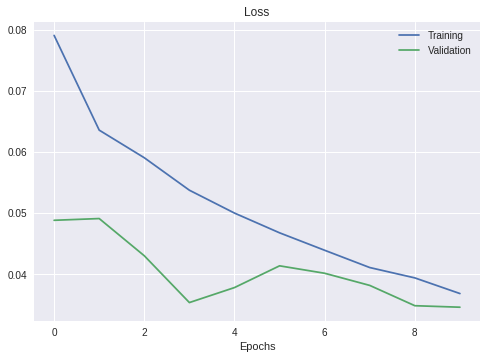

In [33]:
# Modelin sonucu grafiklere aktarma
plt.plot(gecmis.history['loss'])
plt.plot(gecmis.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epochs')

## Modeli Kaydetme ve İndirme
* Oluşturduğumuz modeli *model.save* ile *.h5* uzantısıyla kayıt ediyoruz.
* Kayıt edilen modeli *google.colab* kütüphanesindeki *files* modülü yardımıyla bilgisayarımıza indiriyoruz.
  * Hata oluşursa Chrome üzerinden deneyin.

In [0]:
# Modeli kaydetme
model.save('genereted-udacity-simulated-model.h5')

In [0]:
# Modeli indirme
from google.colab import files
files.download('genereted-udacity-simulated-model.h5')